# Задание 1

# подберём интервал выборки

ln(x)=0; x=1 || ln(x)=1; x=exp(1)

Таким образом интервал [1,e]

Делаем выборку из 200-от элементов, во избежании всяческих ошибок сделаем крайник элементы равными их границам(можно отключить, закомментировав препоследнюю строку, однако теоретическая сумма вероятности не будет равна 1)

In [157]:
import random
import numpy as np
import matplotlib.pyplot as plt
a=1
b=np.exp(1)
N=200
X=[a+random.random()*(b-a) for _ in range(200)]
X[0]=a; X[-1]=b
X=sorted(X)

Строим гистограмму равновероятностным способом

In [158]:
def histogram(a):
    n=len(a)
    m=10
    V=[n/m]*m
    v=20
    A=[a[0]] 
    B=[(a[m]+a[m-1])/2]
    H=[round(B[0]-A[0],2)]
    F=[V[0]/(n*H[0])]
    for i in range(1,m):
        A.append(B[i-1])
        if (i!=m-1):
            B.append((a[(v*(i+1))]+a[(v*(i+1))-1])/2)
        else:
            B.append(a[-1])
        H.append(round(B[i]-A[i],3))
        F.append(V[i]/(n*H[i]))
    print("A[i] B[i] v[i] h[i] f[i]")
    for i in range(m):
        print(A[i],' ',B[i],' ',V[i],' ',H[i],' ',F[i])
    return A,B,V,H,F
    B=[A[0]]+B
    F=[0]+F
def plot_hist(A,B,F):
    B=[A[0]]+B+[B[-1]+0.001]
    F=[0]+F+[0]
    plt.step(B,F)
    

A[i] B[i] v[i] h[i] f[i]
1   1.0512822204450578   20.0   0.05   2.0
1.0512822204450578   1.314807807938938   20.0   0.264   0.3787878787878788
1.314807807938938   1.5174160600987603   20.0   0.203   0.49261083743842365
1.5174160600987603   1.6601844648108859   20.0   0.143   0.6993006993006994
1.6601844648108859   1.9118619396398686   20.0   0.252   0.39682539682539686
1.9118619396398686   2.046438622386333   20.0   0.135   0.7407407407407407
2.046438622386333   2.226180820890775   20.0   0.18   0.5555555555555556
2.226180820890775   2.377442121382626   20.0   0.151   0.6622516556291391
2.377442121382626   2.5481385810778434   20.0   0.171   0.5847953216374269
2.5481385810778434   2.718281828459045   20.0   0.17   0.5882352941176471


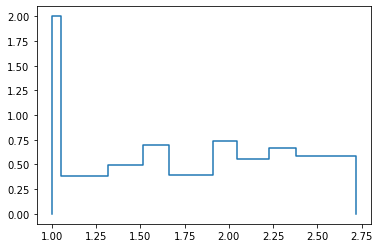

In [159]:
A,B,V,H,F = histogram(X)
plot_hist(A,B,F)

Рассчитаем теоретическую вероятность попадания случайной величины при условии, что гипотеза верна, и значение критерия

In [160]:
f=lambda x: np.log(x)
p,pp,cc,qq=[],[],[],[]
for i in range(len(B)):
    p.append(f(B[i])-f(A[i]))
    c=(p[-1]-0.1)**2
    pp.append(N*c/p[-1])

# Промежуточные результаты

In [161]:
print("i F(A[i]) F(B[i]) p p* критерий для хи квадрата")
for i in range(len(B)):
    print(i+1,' ',f(A[i]),' ',f(B[i]),' ',p[i],' ',pp[i])
print("Хи - квадрат = ",sum(pp))

i F(A[i]) F(B[i]) p p* критерий для хи квадрата
1   0.0   0.05001058148580098   0.05001058148580098   9.99365289962583
2   0.05001058148580098   0.2736905012896389   0.22367991980383792   13.677331944770588
3   0.2736905012896389   0.41700892782441495   0.14331842653477606   2.61862500561777
4   0.41700892782441495   0.5069287195747582   0.0899197917503432   0.2260027439533327
5   0.5069287195747582   0.6480776047208129   0.14114888514605473   2.3992123593624153
6   0.6480776047208129   0.7161010249962092   0.06802342027539632   3.006322371748686
7   0.7161010249962092   0.8002874808618949   0.08418645586568574   0.5940817332585503
8   0.8002874808618949   0.8660251708225216   0.06573768996062668   3.571485064161057
9   0.8660251708225216   0.9353631244090511   0.0693379535865295   2.7118224338379306
10   0.9353631244090511   1.0   0.06463687559094888   3.869464780086438
Хи - квадрат =  42.6680013364226


M = 10, S=0 k=9, значение из таблицы => 21.07

In [134]:
if (sum(pp)<21.07):
    print("Нет оснований отклонять выдвинутую гипотезу")
else:
    print("Гипотеза отклоняется")

Гипотеза отклоняется


# Модифицированная версия для любого интервала

In [165]:
a=1
b=5
N=200
X=[a+random.random()*(b-a) for _ in range(200)]
X[0]=a; X[-1]=b
Y=[np.log(x) for x in X]
Y=sorted(Y)

A[i] B[i] v[i] h[i] f[i]
0.0   0.14547391104297486   20.0   0.15   0.6666666666666666
0.14547391104297486   0.609039342806032   20.0   0.464   0.21551724137931033
0.609039342806032   0.8044386348564734   20.0   0.195   0.5128205128205128
0.8044386348564734   0.9263090308728454   20.0   0.122   0.819672131147541
0.9263090308728454   1.0310233361264438   20.0   0.105   0.9523809523809523
1.0310233361264438   1.1726837806957087   20.0   0.142   0.7042253521126761
1.1726837806957087   1.3228354174000154   20.0   0.15   0.6666666666666666
1.3228354174000154   1.429090058111159   20.0   0.106   0.9433962264150944
1.429090058111159   1.523587026915937   20.0   0.094   1.0638297872340425
1.523587026915937   1.6094379124341003   20.0   0.086   1.1627906976744187


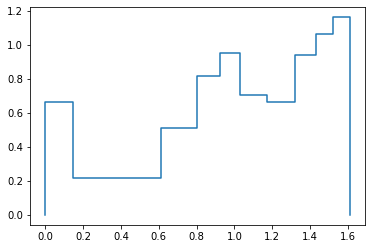

In [166]:
A,B,V,H,F = histogram(Y)
plot_hist(A,B,F)

Далее, чтобы работать нам требуется модификация из функции в функцию распределения = обратной функции - a/(b-a)

Рассчитаем теоретическую вероятность попадания случайной величины при условии, что гипотеза верна, и значение критерия

In [170]:
f=lambda x: (np.exp(x)-a)/(b-a)
p,pp,cc,qq=[],[],[],[]
for i in range(len(B)):
    p.append(f(B[i])-f(A[i]))
    c=(p[-1]-0.1)**2
    pp.append(N*c/p[-1])

Промежуточные значения

In [171]:
print("i F(A[i]) F(B[i]) p p* критерий для хи квадрата")
for i in range(len(B)):
    print(i+1,' ',f(A[i]),' ',f(B[i]),' ',p[i],' ',pp[i])
print("Хи - квадрат = ",sum(pp))

i F(A[i]) F(B[i]) p p* критерий для хи квадрата
1   0.0   0.039146890006357515   0.039146890006357515   18.91900478069631
2   0.039146890006357515   0.20966605601971094   0.17051916601335343   5.832720029641086
3   0.20966605601971094   0.3088603119322424   0.09919425591253145   0.0013089942124532236
4   0.3088603119322424   0.3812929063499769   0.07243259441773453   2.0983974318364362
5   0.3812929063499769   0.4509834334305842   0.0696905270806073   2.6364103907230607
6   0.4509834334305842   0.5576628435124863   0.10667941008190207   0.08364223050720396
7   0.5576628435124863   0.6885126503479612   0.13084980683547487   1.4546610420032993
8   0.6885126503479612   0.7937246369831195   0.1052119866351583   0.05163823163850621
9   0.7937246369831195   0.8971638350129947   0.10343919802987522   0.022869634169594782
10   0.8971638350129947   0.9999999999999998   0.1028361649870051   0.015643974733071865
Хи - квадрат =  31.11629674016102


In [172]:
if (sum(pp)<21.07):
    print("Нет оснований отклонять выдвинутую гипотезу")
else:
    print("Гипотеза отклоняется")

Гипотеза отклоняется


# Задание 2

Построим выборку из 30-и элементов

In [244]:
a=1
b=5
N=30
X=[a+random.random()*(b-a) for _ in range(N)]
Y=[np.log(x) for x in X]
var=sorted(Y)

Построим эмпирическу функцию распределения

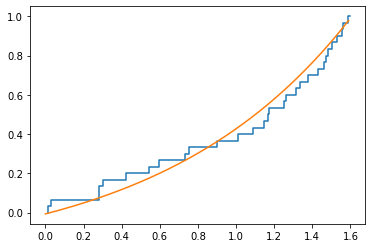

In [245]:
flag=0
interval=[]
p=[]
for index in range(len(var)):
    if (var[index]!=flag):
        flag=var[index]
        interval.append(var[index])
        p.append(index/len(var))
interval.append(interval[-1]+0.01)
p.append(1)
plt.step(interval,p)
u = np.arange(0, 1.6, 0.01)
plt.plot(u,0.252242*np.exp(u)-0.258739)




Теоретическая функция = теоретической из прошлой лабы

выведем критерий

In [257]:
f=lambda x:0.252242*np.exp(x)-0.258739
M=0
for x in range(len(interval)):
    M=max(abs(f(interval[x])-p[x]),M)
M*=np.sqrt(N)
if (M<1.43):
    print("Нет оснований для отклонения")
else:
    print("Отказ")


Нет оснований для отклонения


# Задание 3

Генерим выборку из 50-и элементов

In [264]:
a=1
b=5
N=50
X=[a+random.random()*(b-a) for _ in range(N)]
X=sorted(X)
Y=[np.log(x) for x in X]



посчитаем промежуточные значения

In [265]:
Fn,D=[],[]
for i in range(N):
    Fn.append((i-0.5)/50)
    D.append((Fn[i]-Y[i])**2)
print("i x Fn F D")
for i in range(N):
    print(i+1," ",X[i]," ",Fn[i]," ",Y[i]," ",D[i])

i x Fn F D
1   1.0083131770931968   -0.01   0.008278812955259637   0.00033411500305336757
2   1.1820719731298048   0.01   0.16726880810288855   0.024733478002103182
3   1.2500668814669154   0.03   0.2231970550563913   0.0373251020824623
4   1.3418826412061766   0.05   0.2940735840594193   0.059571914435610426
5   1.347757467609732   0.07   0.29844207613171764   0.05218578214736947
6   1.3593894644173834   0.09   0.30703567572925095   0.04710448453925257
7   1.3950784257818776   0.11   0.33295063289156757   0.049706984706750536
8   1.520897532922509   0.13   0.4193006427780375   0.08369486191178567
9   1.5217299721942616   0.15   0.4198478272698118   0.0728178498822382
10   1.6834555188550602   0.17   0.5208485374434134   0.12309469622618224
11   1.780459405903771   0.19   0.576871424208038   0.14966949886875572
12   1.7976676531624332   0.21   0.5864900764513947   0.14174477766637708
13   2.0857439996900484   0.23   0.7351256259842336   0.25515189802596383
14   2.1705721954793344   0.2

От входных параметров граница 0.744 чекаем на правдободобность

In [266]:
if (sum(D))/(12*N)<:
    print("Гипотеза верна")
else:
    print("Отказ")

Гипотеза верна


# Поставьте 65